# Importing

In [1]:
import numpy as np
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.model_selection as ms

# Artificial Data creation

In [2]:
def CreateDataset(Cs, nD, S):
    nC = len(Cs)
    N = nD * nC
    X = np.zeros((N, 2))
    Y = np.zeros((N, 1))
    for i in range(0, nD):
        for j in range(0, nC):
            X[nC*i + j, 0] = Cs[j, 0] + np.random.randn() / S
            X[nC*i + j, 1] = Cs[j, 1] + np.random.randn() / S
            Y[nC*i + j, 0] = j
    return X, Y

In [3]:
Cs = np.array([[-0.5, 1], [1.5, 0], [-1, -1.5], [-2, 2.5], [0.5, 2]])

nD = 140
S = 2.9

In [4]:
X, Y = CreateDataset(Cs, nD, S)

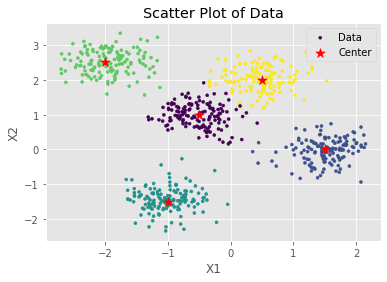

In [5]:
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1],c = Y[:, 0], s = 9, label = 'Data')
plt.scatter(Cs[:,0], Cs[:, 1], c = 'r', s = 100, label = 'Center', marker = '*')
plt.title('Scatter Plot of Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


In [6]:
def Distance(xi, xj):
    dij = xi - xj
    d = np.linalg.norm(dij)
    return d

In [7]:
def CalculateAllDistances(X, xi):
    N = np.shape(X)[0] # Data Size
    D = np.zeros(N) # Placeholder For Distances
    for i in range(0, N):
        xj = X[i]
        D[i] = Distance(xi, xj)
    return D

In [8]:
def KNN(K, X, xi):
    D = CalculateAllDistances(X, xi) # Calculating Distances
    A = np.argsort(D) # Sorted Args by Distance
    Ns = A[:K] # K-Nearest Neighbors
    return Ns

In [9]:
def GetClass(NsLabels):
    L = NsLabels.copy()
    W = {}
    for i in L:
        if i not in W.keys():
            W[i] = 1
        else:
            W[i] += 1
    MaxN = max(W.values()) # Max Count of Most Frequent Label
    BestClasses = []
    for k, v in W.items():
        if v == MaxN:
            BestClasses.append(k)
    while len(BestClasses) > 1: # While There is More Than One Best-Class
        L = L[:-1] # Remove One Element From End
        W = {}
        for i in L:
            if i not in W.keys():
                W[i] = 1
            else:
                W[i] += 1
        MaxN = max(W.values())
        BestClasses = []
        for k, v in W.items():
            if v == MaxN:
                BestClasses.append(k)
    Best = BestClasses[0]
    return Best

In [10]:
def Classify(K, X, Y, xi):
    Ns = KNN(K, X, xi) # Getting Neighbors Args
    NsLabels = Y[Ns,0] # Getting Neighbors Labels
    C = GetClass(NsLabels)
    return C

# Data Spliting

In [11]:
trX, teX, trY, teY = ms.train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [12]:
trPrediction = np.zeros(np.size(trY))
tePrediction = np.zeros(np.size(teY))

In [13]:
K = 5

# Making Predictions On Train Dataset
for i in range(0, np.size(trY)):
    xi = trX[i]
    pred = Classify(K, trX, trY[:,0], xi)
    trPrediction[i] = pred

# Making Predictions On Test Dataset
for i in range(0, np.size(teY)):
    xi = teX[i]
    pred = Classify(K, trX, trY[:,0], xi)
    tePrediction[i] = pred

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [16]:
trAccuracy = met.accuracy_score(trY, trPrediction) # Accuracy On Train Dataset
teAccuracy = met.accuracy_score(teY, tePrediction) # Accuracy On Test Dataset